# Лашук А.Д. 17-АС
## Вариант 6
### Индекс счастья
Задание:
1. Визуализируйте корреляции между признаками, находящимися в наборе данных (heatmap). Сделайте выводы.
2. Постройте график счастья по регионам, страны на графике должны представляться отдельными точками.
3. Оцените количество счастья по годам по регионам.
4. Определите наиболее сильно изменяющиеся параметры по разным странам в разные годы.
5. Определите страны, появляющиеся и исчезающие в рейтинге стран.
6. Удалите строки с пропущенными значениями. Выведите размер набора данных до и после удаления.
7. Вычислите корреляцию Пирсона и Спирмена между признаками Trust.Government.Corruption и Family. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.
8. Добавьте в набор данных признак, являющийся суммой двух других признаков.

Результат выполнения функций библиотеки Pandas:


In [17]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

f15 = pd.read_csv('2015.csv')
f16 = pd.read_csv('2016.csv')
f17 = pd.read_csv('2017.csv')

In [18]:
f15.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [19]:
f16.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [20]:
f17.tail()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024
154,Central African Republic,155,2.693,2.864884,2.521116,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005


In [21]:
f17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [22]:
f15.drop_duplicates()
f15.dropna()
f16.drop_duplicates()
f16.dropna()
f17.drop_duplicates()
f17.dropna()
pass

In [23]:
f15.shape, f16.shape, f17.shape

((158, 12), (157, 13), (155, 12))

## 1. Визуализируйте корреляции между признаками, находящимися в наборе данных (heatmap). 

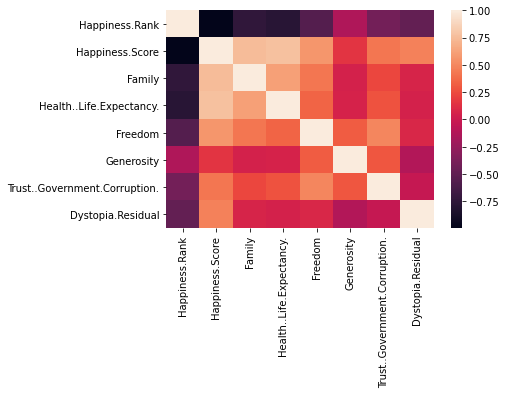

In [24]:
correlation_heatmap = f17.drop(['Whisker.high','Whisker.low','Economy..GDP.per.Capita.'], axis=1).corr()
sns.heatmap(correlation_heatmap)
plt.plot()
plt.show()

## 2. Постройте график счастья по регионам, страны на графике должны представляться отдельными точками.

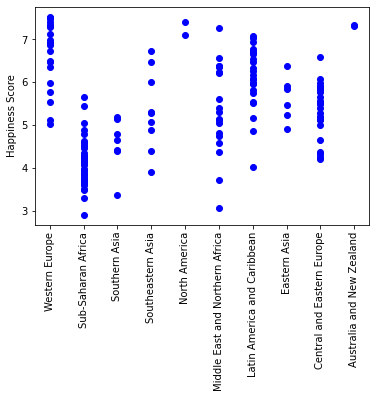

In [25]:
fall2 = pd.DataFrame(f16.sort_values(by='Region', ascending=False))
fall2 = fall2.reset_index(drop=True)
plt.ylabel('Happiness Score')
x = 0
region = fall2['Region'][0]
_x = [0]
labels = [fall2['Region'][0]]
for i in range(0, f16.last_valid_index()+1):
    if region is not fall2['Region'][i]:
        labels.append(fall2['Region'][i])
        region = fall2['Region'][i]
        x = x + 1
        _x.append(x)
    plt.plot(x, fall2['Happiness Score'][i], 'bo')
plt.xticks(_x, labels, rotation='vertical')
plt.show()

## 3.Оцените количество счастья по годам по регионам.

In [26]:
sch15 = f15.loc[:, ('Country', 'Region')]
sch16 = f16.loc[:, ('Country', 'Region')]
sch15_16 = sch15.merge(sch16, how='outer')
f17_cr = f17.merge(sch15_16, on='Country')

pd.DataFrame({
    '2015': f15.groupby(['Region'])['Happiness Score'].mean(),
    '2016': f16.groupby(['Region'])['Happiness Score'].mean(),
    '2017': f17_cr.groupby(['Region'])['Happiness.Score'].mean()
})

,2015,2016,2017
Region,,,
Australia and New Zealand,7.285000,7.323500,7.299000
Central and Eastern Europe,5.332931,5.370690,5.409931
Eastern Asia,5.626167,5.624167,5.496500
Latin America and Caribbean,6.144682,6.101750,5.957818
Middle East and Northern Africa,5.406900,5.386053,5.369684
North America,7.273000,7.254000,7.154500
Southeastern Asia,5.317444,5.338889,5.444875
Southern Asia,4.580857,4.563286,4.628429
Sub-Saharan Africa,4.202800,4.136421,4.111949


## 4. Определите наиболее сильно изменяющиеся параметры по разным странам в разные годы.

In [27]:
def print_rating(df, label):
    rating = df.std() / df.mean()
    print('\n{}\n{}'.format(label, rating.sort_values()[::-1]))
    
fall3 = pd.concat([pd.concat([f15, f16]), f17])
    
print_rating(f15, "2015")
print_rating(f16, "2016")
print_rating(f17, "2017")
print_rating(fall3, 'All')


2015
Trust (Government Corruption)    0.836930
Happiness Rank                   0.575572
Generosity                       0.533870
Economy (GDP per Capita)         0.476425
Health (Life Expectancy)         0.392026
Standard Error                   0.358072
Freedom                          0.351581
Family                           0.274830
Dystopia Residual                0.263724
Happiness Score                  0.212996
dtype: float64

2016
Trust (Government Corruption)    0.806822
Happiness Rank                   0.575659
Generosity                       0.551263
Economy (GDP per Capita)         0.432544
Health (Life Expectancy)         0.411301
Freedom                          0.392208
Family                           0.336062
Dystopia Residual                0.233132
Lower Confidence Interval        0.217334
Happiness Score                  0.212121
Upper Confidence Interval        0.207315
dtype: float64

2017
Trust..Government.Corruption.    0.825702
Happiness.Rank              

## 5. Определите страны, появляющиеся и исчезающие в рейтинге стран.

In [28]:
def get_diff(first, second):
    summ = pd.merge(first, second, how='outer', indicator=True, on='Country')
    return summ[summ['_merge'] != 'both']

f1516 = get_diff(f15, f16)
f1517 = get_diff(f15, f17)
f1617 = get_diff(f16, f17)
merged_diff = pd.merge(pd.merge(f1516, f1517, how='outer'), f1617, how='outer') 

print(merged_diff['Country'].drop_duplicates())

0                         Oman
1            Somaliland region
2                   Mozambique
3                      Lesotho
4                    Swaziland
5                     Djibouti
6     Central African Republic
7                  Puerto Rico
8                       Belize
9                      Somalia
10           Somaliland Region
11                     Namibia
12                 South Sudan
13                      Taiwan
14                    Suriname
15                   Hong Kong
16                        Laos
17                     Comoros
18    Taiwan Province of China
20     Hong Kong S.A.R., China
Name: Country, dtype: object


## 7. Вычислите корреляцию Пирсона и Спирмена между признаками Trust.Government.Corruption и Family. Постройте гистограммы для указанных признаков. Оцените значение p-value.

Spearman p-value: 0.033030560192946354
Pearson p-value: 0.00055814552677733


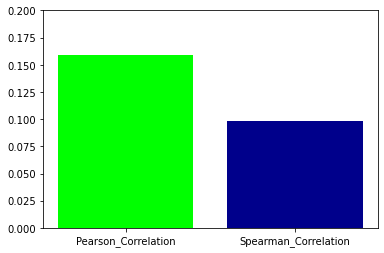

In [29]:
df1 = pd.DataFrame({'Trust (Government Corruption)': f17['Trust..Government.Corruption.'],
                  'Family':f17['Family'],
                  'Country':f17['Country']})
fall4 = pd.concat([pd.concat([f15, f16]), df1])

for seria in fall4.drop(['Country', 'Region'], axis=1):
    fall4[seria] = fall4[seria].fillna(fall4[seria].mean())
    
p_corr, p_pval = stats.pearsonr(fall4['Family'], fall4['Trust (Government Corruption)'])
s_corr, s_pval = stats.spearmanr(fall4['Family'], fall4['Trust (Government Corruption)'])

labels = ('Pearson_Correlation', 'Spearman_Correlation')
plt.bar(range(2), [p_corr, s_corr], color=('#00ff00', '#00008b'), tick_label=labels)
plt.ylim(ymax=0.2)

print('Spearman p-value: {}\nPearson p-value: {}'.format(s_pval, p_pval))

## 8. Добавьте в набор данных признак, являющийся суммой двух других признаков.

In [30]:
f17 = f17.assign(Rasnost=pd.Series(f17['Whisker.high'] + f17['Whisker.low'], index=f17.index))
f17

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Rasnost
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,15.074
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,15.044
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,15.008
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,14.988
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,14.938
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,6.942
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,6.924
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,6.698
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,5.810
